<a href="https://colab.research.google.com/github/jinsumin81/BD-team/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.precision', 2)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.7 MB/s eta 0:00:00


In [4]:
ttn= pd.read_csv('titanic1309.csv')

In [5]:
ttn.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket    Fare Cabin Embarked  
0         0           A/5 21171    7.25   NaN        S  
1         0            PC 17599   71.28   C85        C  
2         0    STON/O2. 3101282    7.92   NaN        S  
3         0              113803   53.10  C123        S  
4         0              373450    8.05   NaN        S  
...     ...                 ...     ...   ...      ...  
1304      0           A.5. 3236    8.05   NaN        S  
1305      0            PC 17758  108.90  C105        C  
1306      0  SOTON/O.Q. 3101262    7.25   NaN        S  
1307      0              359309    8.05   NaN        S  
1308      1                2668   22.36   NaN        C  

[1309 rows x 12 columns]>

In [7]:
ttn.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         141
        2         100
        3         144
male    1          45
        2          17
        3          47
Name: Survived, dtype: int64

#탑승객 분석

In [8]:
ttn['Sex'].value_counts()

,count
Sex,
male,843
female,466


In [9]:
ttn['Pclass'].value_counts().sort_index()

,count
Pclass,
1,323
2,277
3,709


In [10]:
ttn.groupby(['Sex', 'Pclass']).size().unstack()

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


<Axes: xlabel='Sex', ylabel='count'>

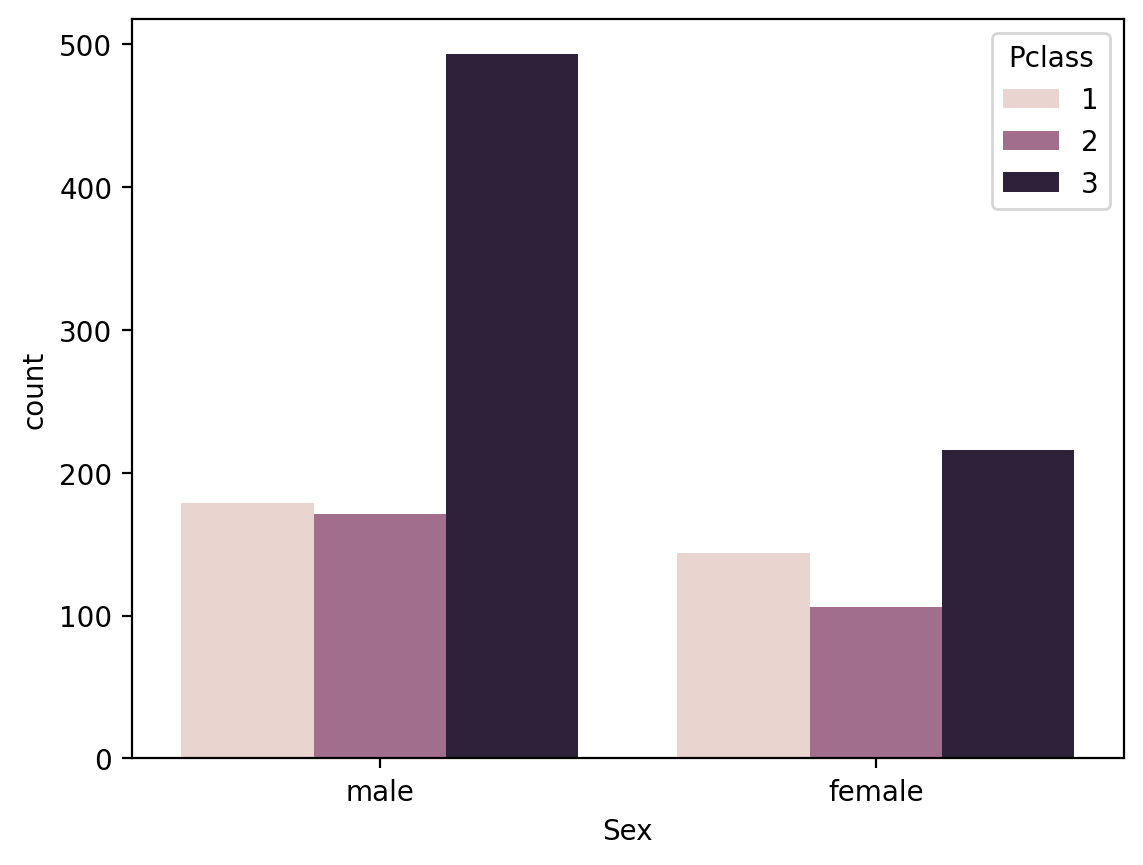

In [11]:
sns.countplot(ttn,x='Sex',hue='Pclass')

In [12]:
ttn['Age'].isnull().sum()

np.int64(263)

In [13]:
ttn1 = ttn.dropna(subset=['Age'])

<ipython-input-14-29ff5cbd627c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttn1['AgeGroup'] = pd.cut(ttn1['Age'], bins=bins, labels=labels)


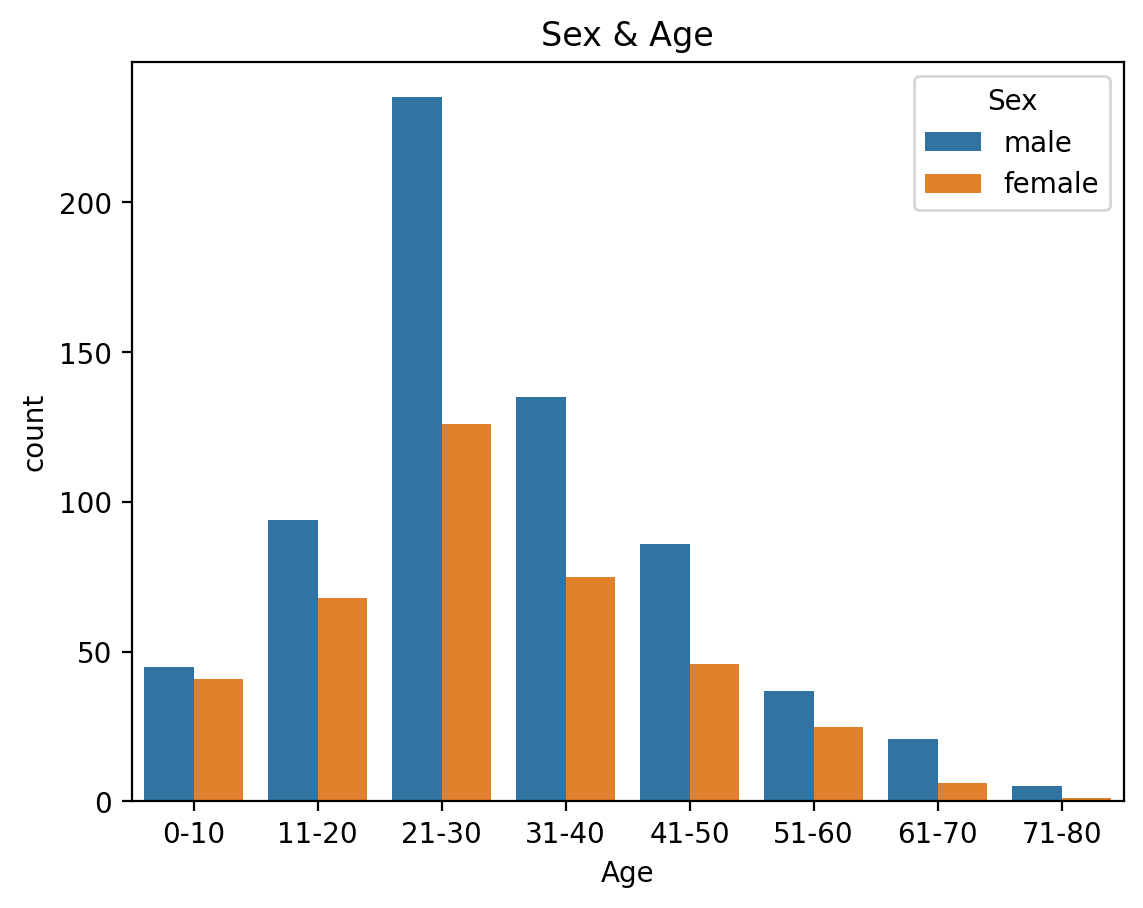

In [14]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
ttn1['AgeGroup'] = pd.cut(ttn1['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeGroup', hue='Sex', data=ttn1, order=labels)
plt.title('Sex & Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Sex')
plt.show()